<a href="https://colab.research.google.com/github/Mahadevkharmate/DeepLearning_Hub/blob/main/experiments/01_Customer_churn_prediction_using_ANN_Keras_and_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction using ANN | Keras and Tensorflow | Deep Learning Classification

**Credit Card Customer Churn Prediction**

* #NOTE: Our main goal is to learn how to build ANN using Kearas and Teansorflow

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Mahadevkharmate/DeepLearning_Hub/refs/heads/main/datasets/Churn_Modelling.csv")
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df,columns = ["Geography","Gender"],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=["Exited"])
y= df["Exited"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
y_train.shape

(8000,)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

In [ ]:
# model = Sequential()

# model.add(Dense(3,activation ="sigmoid",input_dim =11))
# model.add(Dense(1,activation ="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model = Sequential([
    Input(shape=(11,)),
    Dense(64,activation ="relu",name="layer1"),
    Dense(32,activation = "relu",name ="layer2"),
    Dense(16,activation = "relu",name ="layer3"),
    Dense(1,activation ="sigmoid",name = "layer4")
])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer4 (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train_scaled,y_train,batch_size=50,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7988 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8006 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8015 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7981 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7951 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8007 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 7/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 8/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8003 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 9/50
128/128 ━━━━━

In [ ]:
pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
model.layers[0].get_weights()

[array([[ 0.06981268,  0.29956856,  0.04078772, -0.06893557,  0.12811568,
         -0.11378107, -0.41705534,  0.08270948,  0.15799107, -0.42086357,
         -0.07669533],
        [ 0.13554001, -0.09151907, -0.4698254 ,  0.9478432 , -0.689511  ,
          0.3592433 , -0.667233  , -0.15297176,  1.0209047 ,  0.90083176,
          0.05797463],
        [-0.05655319,  0.21272323, -0.02970544,  0.0747205 ,  0.02434383,
          0.18034941, -0.17644674, -0.1704967 ,  0.39856157, -0.25625098,
          0.18421733],
        [ 0.4353825 ,  0.38946176,  0.3257773 , -0.42172602, -0.15068248,
          0.3419633 ,  0.16282253, -0.32543573,  0.21789628, -0.13500936,
         -0.10967311],
        [ 1.0599858 , -0.7437114 , -0.22764453, -0.7589697 ,  0.22879736,
          0.12920283, -0.17200951,  0.29839125,  0.40607372, -0.3896847 ,
          0.73382986],
        [-0.06633328, -0.013439  ,  0.04922759,  0.0428737 ,  0.02357051,
          0.03026959, -0.16540322, -0.08209278,  0.17245325, -0.4000533

In [ ]:
model.layers[1].get_weights()

[array([[-3.62271190e-01, -7.13538527e-01, -5.36571324e-01,
          6.18579328e-01, -1.64796188e-01,  2.67486036e-01,
          7.91106701e-01, -3.40756595e-01, -5.98000064e-02,
          7.59628415e-01, -3.37196410e-01],
        [ 4.22362149e-01, -4.39151824e-01,  5.97508371e-01,
          3.18333238e-01,  1.49646863e-01,  3.03100646e-01,
         -1.87188461e-01,  4.41480488e-01,  3.54249120e-01,
         -6.86211526e-01,  4.00832474e-01],
        [ 4.61460352e-02,  2.59012014e-01,  1.99015632e-01,
         -1.95922047e-01,  3.87875348e-01, -7.55167902e-01,
          2.16325209e-01,  3.00434113e-01,  4.10945475e-01,
         -2.06035048e-01,  6.80905461e-01],
        [ 7.05916658e-02,  2.32076854e-04,  2.09720507e-01,
         -9.42240134e-02,  5.29566288e-01, -4.10162598e-01,
          3.25432509e-01,  4.29376423e-01, -4.88342673e-01,
         -9.24233198e-01, -2.45959699e-01],
        [-1.38523080e-03,  2.33702764e-01,  3.19672413e-02,
         -7.14165092e-01,  4.37138170e-01,  

In [ ]:
pred

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.where(pred>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

In [ ]:
model_valid = model.fit(X_train_scaled,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8051 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8003 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8041 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7987 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7923 - loss: nan - val_accuracy: 0.7975 - val_loss: nan
Epoch 9/100
128/

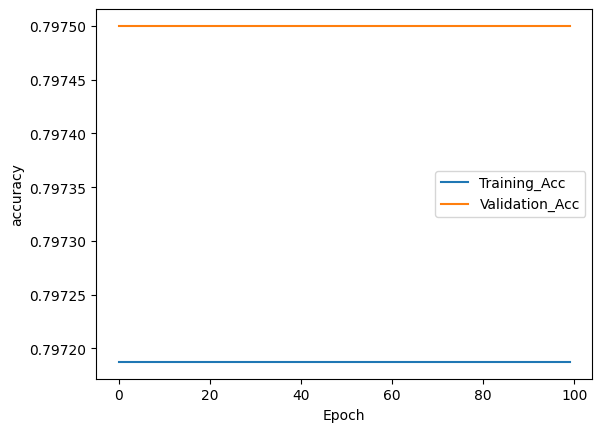

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(model_valid.history["loss"],label = "Training_loss")
# plt.plot(model_valid.history["val_loss"],label = "Validation_loss")

plt.plot(model_valid.history["accuracy"],label = "Training_Acc")
plt.plot(model_valid.history["val_accuracy"],label = "Validation_Acc")
plt.ylabel("accuracy")
plt.xlabel("Epoch")
# plt.ylim()
plt.legend()
plt.show()
